## 循环神经网络

### 介绍

循环神经网络（Recurrent Neural Network, RNN）是一种非常重要的深度学习算法，输入数据的形式为序列，比如一段文字、一段语音等，并且在序列的演进方向上进行递归运算，与人类阅读一段文本或者表达一段话语等过程十分类似，因而在许多自然语言处理任务上有着举足轻重的地位。

#### 知识点

- Vanilla RNN
- LSTM 与 GRU
- 基于 PyTorch 搭建 LSTM

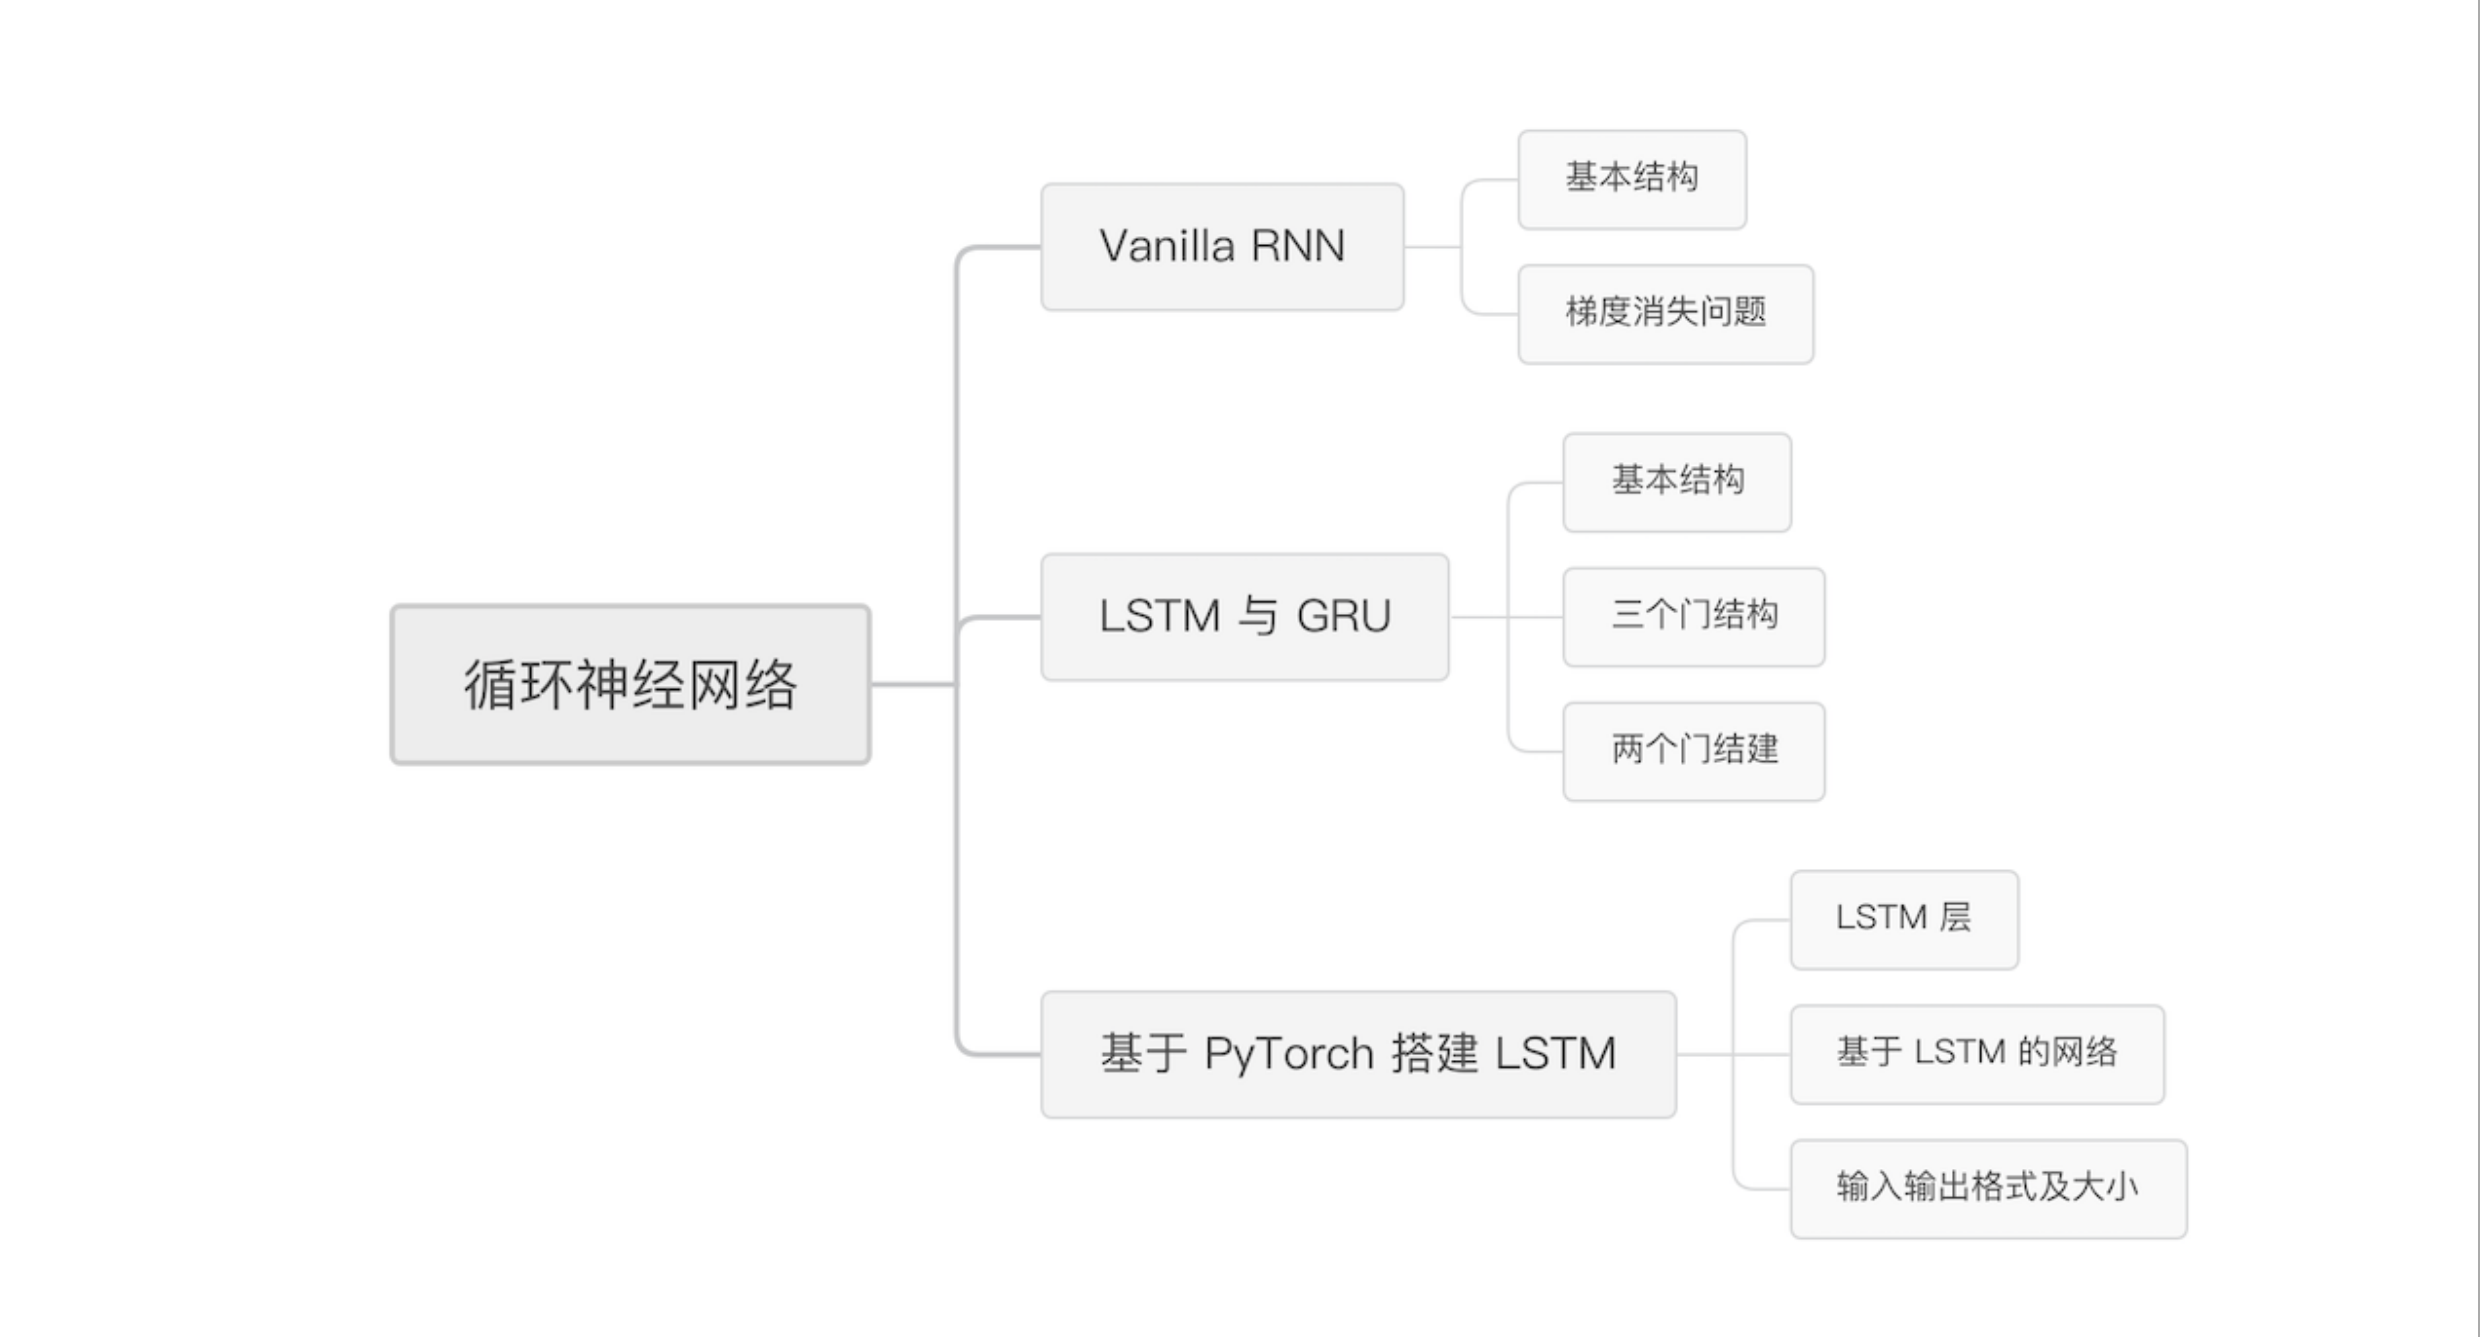

###  Vanilla RNN

循环神经网络是一个<font color=#0099ff>**有向循环**</font>的过程，“有向”是因为朝着序列方依次输入各序列成分以及上一步的输出成分，“循环”是因为每个序列成分进行运算的参数是一致的，因为它对数据的每个输入执行相同的功能，而当前输入的输出<font color=#0099ff>**取决于**</font>上一步的计算。

与前馈神经网络不同， 循环神经网络可以使用其内部状态（隐状态）来处理输入序列。这使它们适用于诸如语音、文本等序列数据。而在其他神经网络中，所有输入都是<font color=#0099ff>**彼此独立**</font>的。但是在循环神经网络中，所有输入都是<font color=#0099ff>**相互关联**</font>的，如下图所示为基本的循环神经网络模型结构: Vanilla RNN。

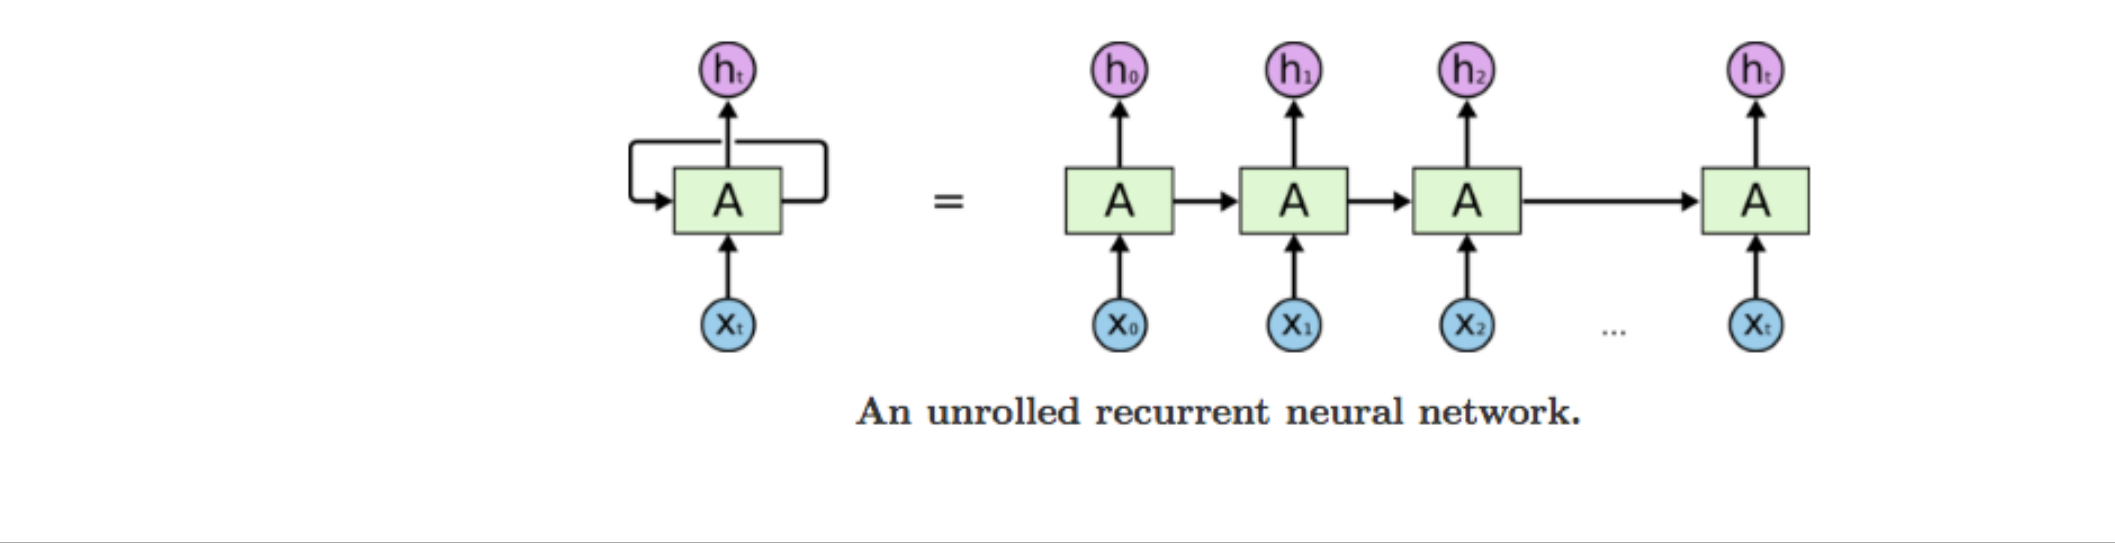

首先，从输入序列中获取 $X_0$，然后输出隐状态 $h_0$，它与 $X_1$ 一起作为下一步的输入。同样地，下一个 $h_1$ 和 $X_2$ 一同作为下一步的输入，依此类推。应用如此的结构，可以在训练时不断<font color=#0099ff>**记住上文**</font>(类似于人类一个个词地阅读文章，在阅读每个词时带有前文的记忆)。

当前步隐状态的公式是：

<center>$$h_t = f(h_{t-1},X_t)$$</center>

具体计算形式如下：

<center>$$h_t = tanh(W_{hh}h_{t-1}+W_{xh}X_t)$$</center>

当前步的最后输出（在隐状态的基础上进行全连接计算）：

<center>$$y_t = W_{hy}h_{t}$$</center>

其中，所有的 $W$ 都是模型权重，用于线性运算，$h_{t-1}$ 是上一步的隐状态，双曲正切函数 $tanh$ 是激活函数，用于非线性运算，$y_t$ 是当前步的最后输出。这就是一步运算过程，序列有<font color=#0099ff>**多长**</font>，就有<font color=#0099ff>**多少次**</font>以上运算，而每一步都有相应的隐状态及最后输出，这些向量表征<font color=#0099ff>**包含**</font>了前面序列的信息。

循环神经网络每一步的输出都包含了前面步骤的信息，因此具备记忆功能，而记忆功能是解读<font color=#0099ff>**语境**</font>的关键。比如，对于“小梅很喜欢吃桔子，她不喜欢吃苹果”这句话，如果逐词输入输出但是缺少记忆性，我们只能解析出一个个独立词所表达的意思，反之，在具备记忆的情况下，当看到桔子时，可知其不仅仅指“水果的概念”，而是“一个人喜欢的食物对象”。因此循环神经网络很适合处理<font color=#0099ff>**序列间存在联系**</font>的场景。

上图中展示了一个最基本最简单的单向循环神经网络，实际上根据需求可以在此基础上有所改进。如可以将单向序列行进的网络改为<font color=#0099ff>**双向**</font>循环神经网络，因为很多时候，对于一个序列，元素之间的影响可以是双向的，即从前往后以及从后往前。还是以“小梅很喜欢吃桔子，她不喜欢吃苹果”为例，如果从后往前看，先看过“她不喜欢吃苹果”，再看到“桔子”，也能大概知道“桔子”可能和“一个人的喜好”相关。所以，双向循环神经网络能够提供<font color=#0099ff>**更丰富的信息**</font>。

而在事实应用中，Vanilla RNN 并不常用，这是因为其在梯度下降过程中，存在累乘项及激活函数的值域导致的<font color=#0099ff>**梯度消失和爆炸问题**</font>，也就是说，训练 Vanilla RNN 是一项非常困难的任务，无法处理很长的序列，获取不到远距离的信息。

### LSTM 与 GRU

长短期记忆（LSTM）网络是 Vanilla RNN 的修改版，该网络由 Hochreiter & Schmidhuber (1997) 引入，并有许多人对其进行了改进和普及，可以更轻松地记住序列中的更长距离的过去数据，通过特制的门控结构改变了梯度更新的表达式，从而<font color=#0099ff>**缓解**</font>了梯度消失问题（梯度爆炸可通过梯度裁剪解决）。LSTM 非常适合对序列数据进行分类，标注和预测。 LSTM 基本结构如下：

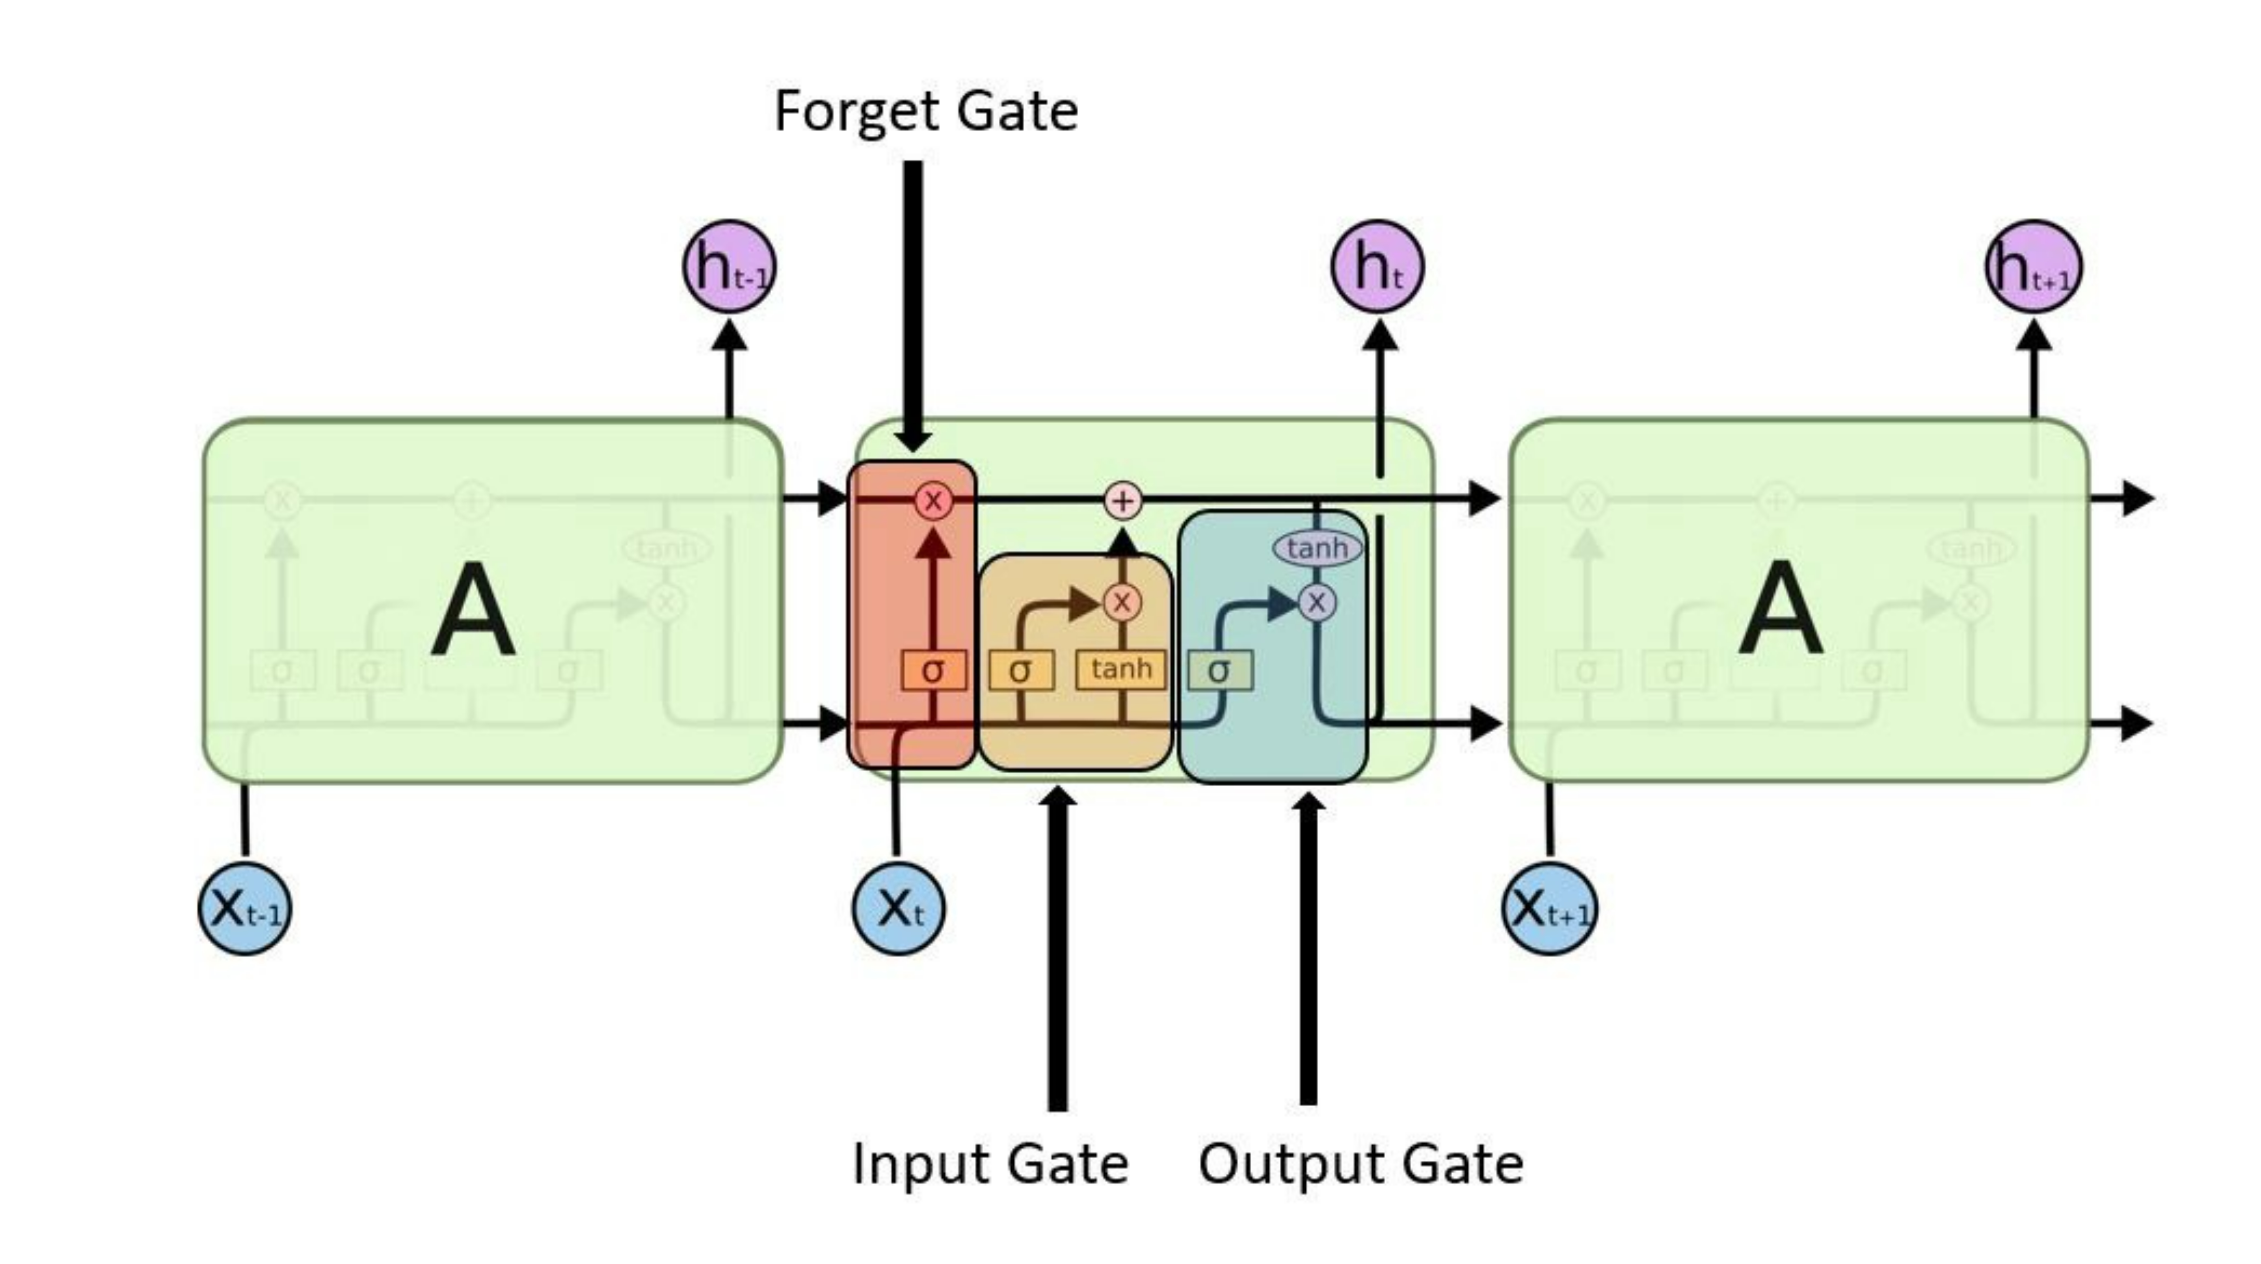

LSTM 的核心是细胞状态，用贯穿细胞的水平线表示。细胞状态像传送带一样，贯穿整个细胞却只有很少的分支，这样能保证信息稳定地流过整个网络，就好比人的记忆状态能够贯穿人的一生。

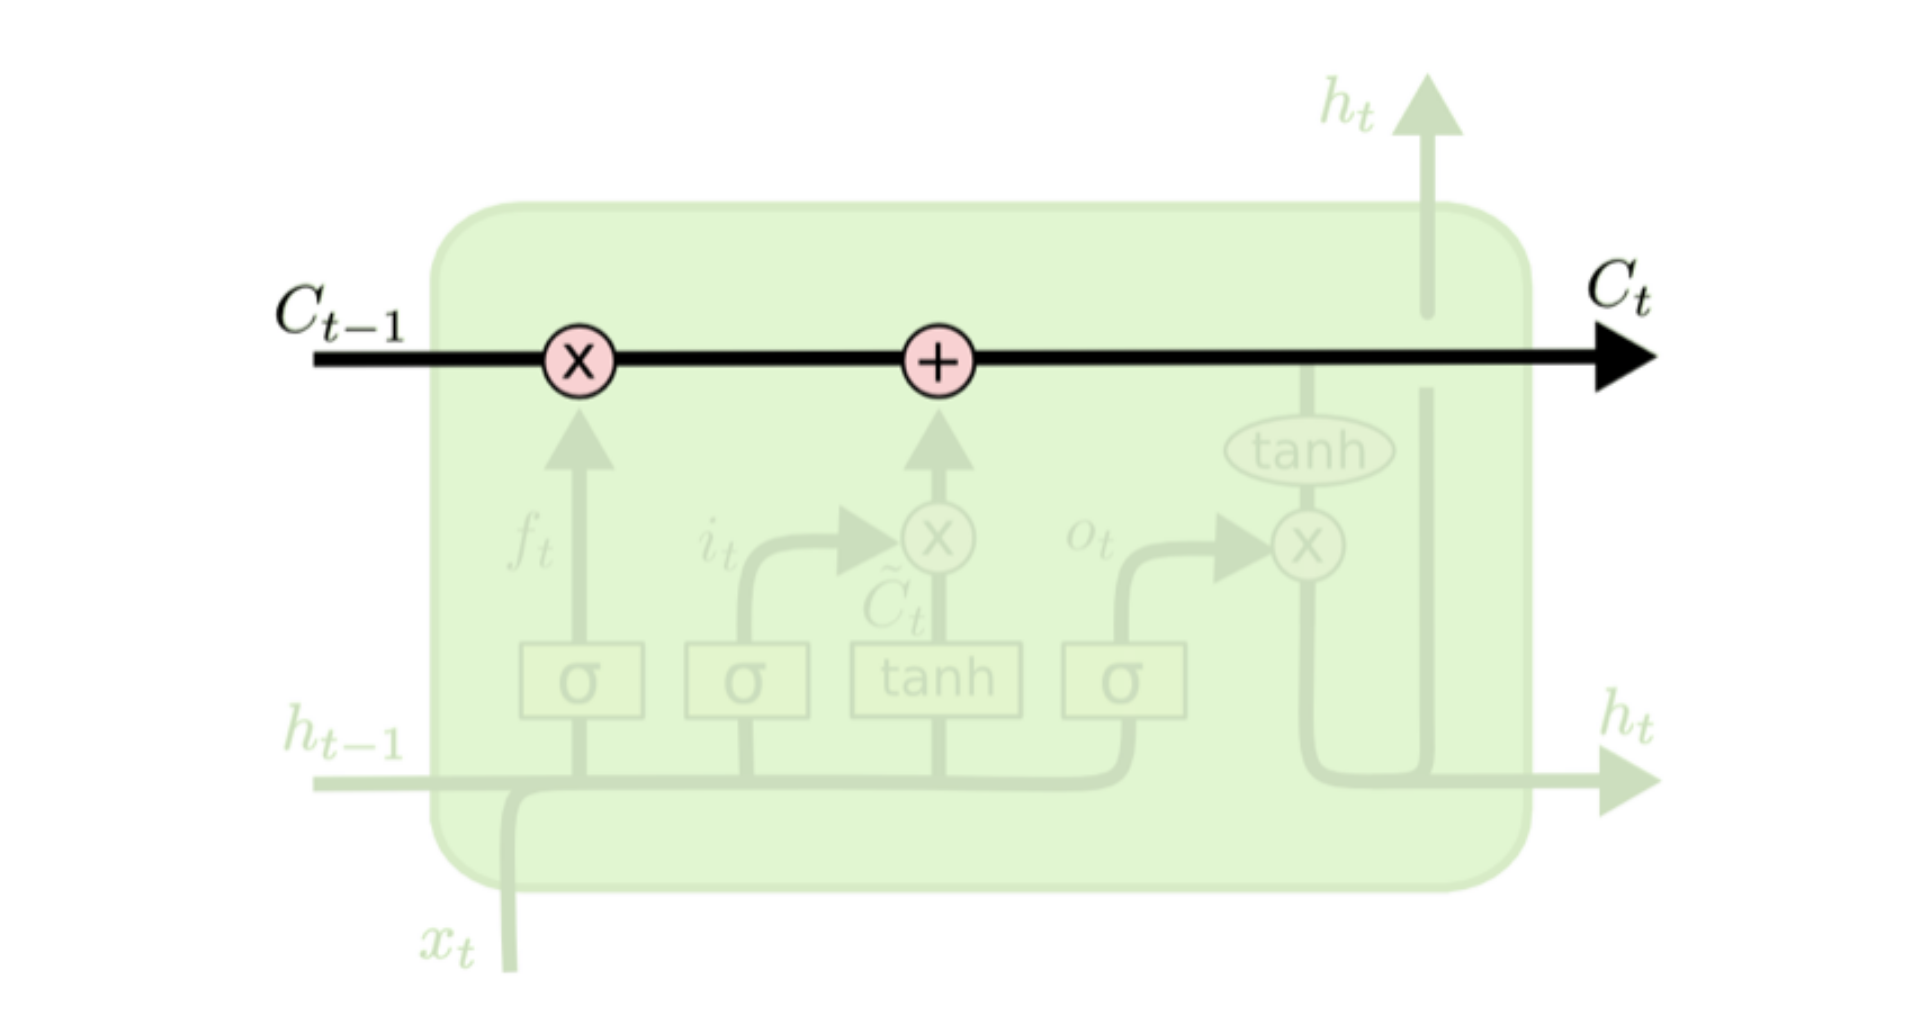

LSTM 网络能通过一种被称为<font color=#0099ff>**门**</font>的结构对细胞状态进行删除或者添加信息。门能够有<font color=#0099ff>**选择性**</font>地决定让哪些信息通过。其实门的结构很简单，即 Sigmoid 层和点乘操作的组合。因为 Sigmoid 层的输出是在 0-1 之间，这代表有多少<font color=#0099ff>**概率**</font>的信息保留下来，0 表示都不能通过，1 表示都能通过。LSTM 里面包含三个门：<font color=#0099ff>**忘记门、输入门和输出门**</font>。

忘记门：决定细胞状态需要<font color=#0099ff>**丢弃**</font>哪些无用信息。这部分操作是通过一个称为忘记门的 Sigmoid 单元来处理，通过查看 $ℎ_{t−1}$ 和 $x_t$ 信息来输出一个 0-1 之间的向量，该向量里面的 0-1 值表示细胞状态 $C_{t−1}$ 中的哪些信息保留或丢弃多少。0 表示不保留，1 表示都保留。

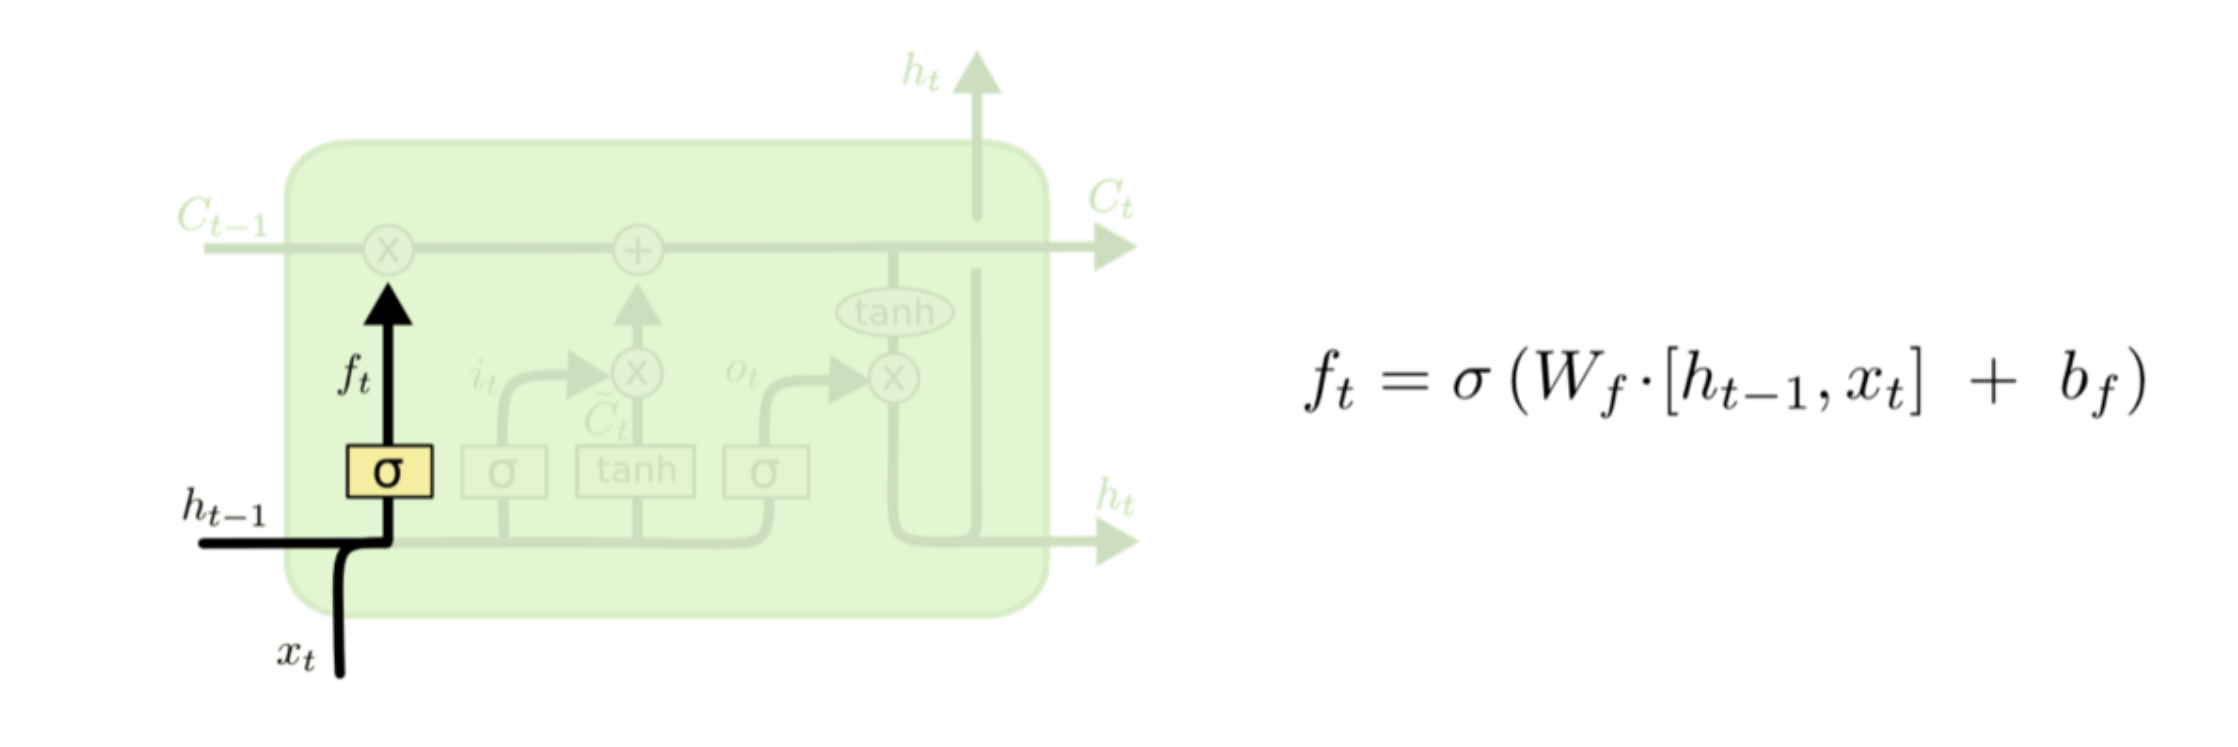

输入门：决定给细胞状态添加哪些新的信息。利用 $ℎ_{t−1}$ 和 $x_t$ 通过一个称为输入门的操作来决定<font color=#0099ff>**更新**</font>哪些信息。再利用 $ℎ_{t−1}$ 和 $x_t$ 通过一个 tanh 层得到新的候选细胞信息  $\widetilde{C_t}$，这些信息可能会被更新到细胞信息中。

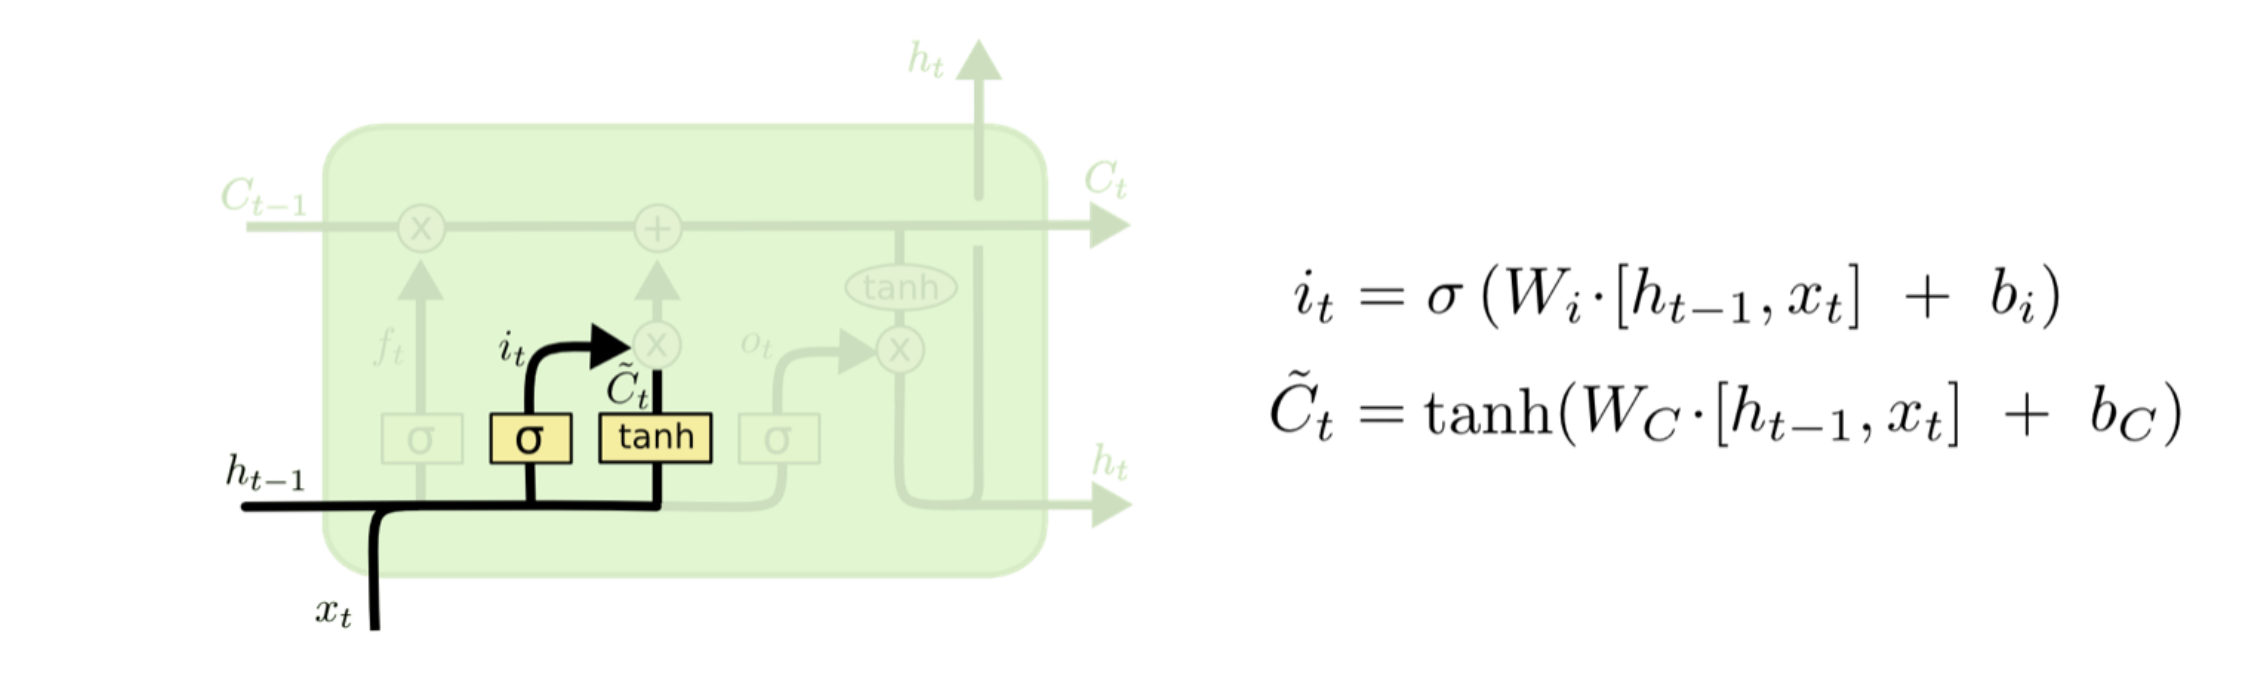

接下来，更新旧的细胞信息 $C_{t−1}$，变为新的细胞信息 $C_t$。更新的规则，通过忘记门选择忘记旧细胞信息的一部分，通过输入门选择添加候选细胞信息 $\widetilde{C_t}$ 的一部分得到新的细胞信息 $C_t$。

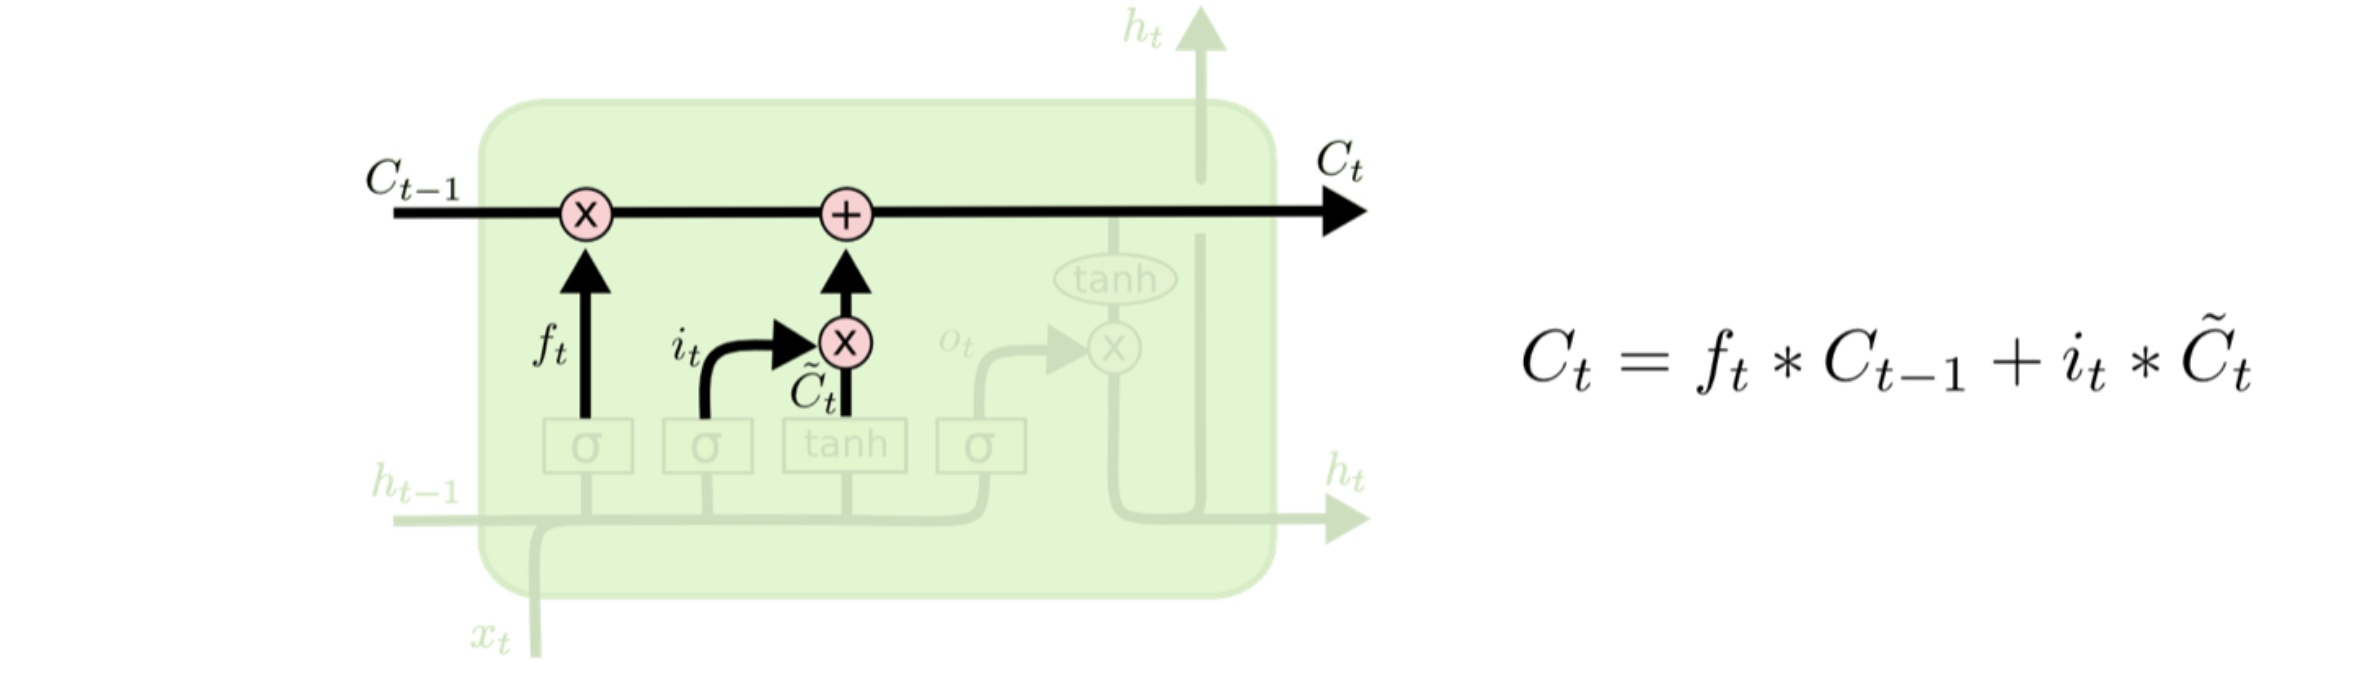

输出门：根据输入的 $ℎ_{t−1}$ 和 $x_t$ 来判断<font color=#0099ff>**输出**</font>细胞的哪些状态特征。需要将输入经过一个称为输出门的
Sigmoid 层得到判断条件，然后将细胞状态经过 tanh 层得到一个 -1~1 之间值的向量，该向量与输出门得到的判断条件相乘就得到了最终该 LSTM 单元的输出。

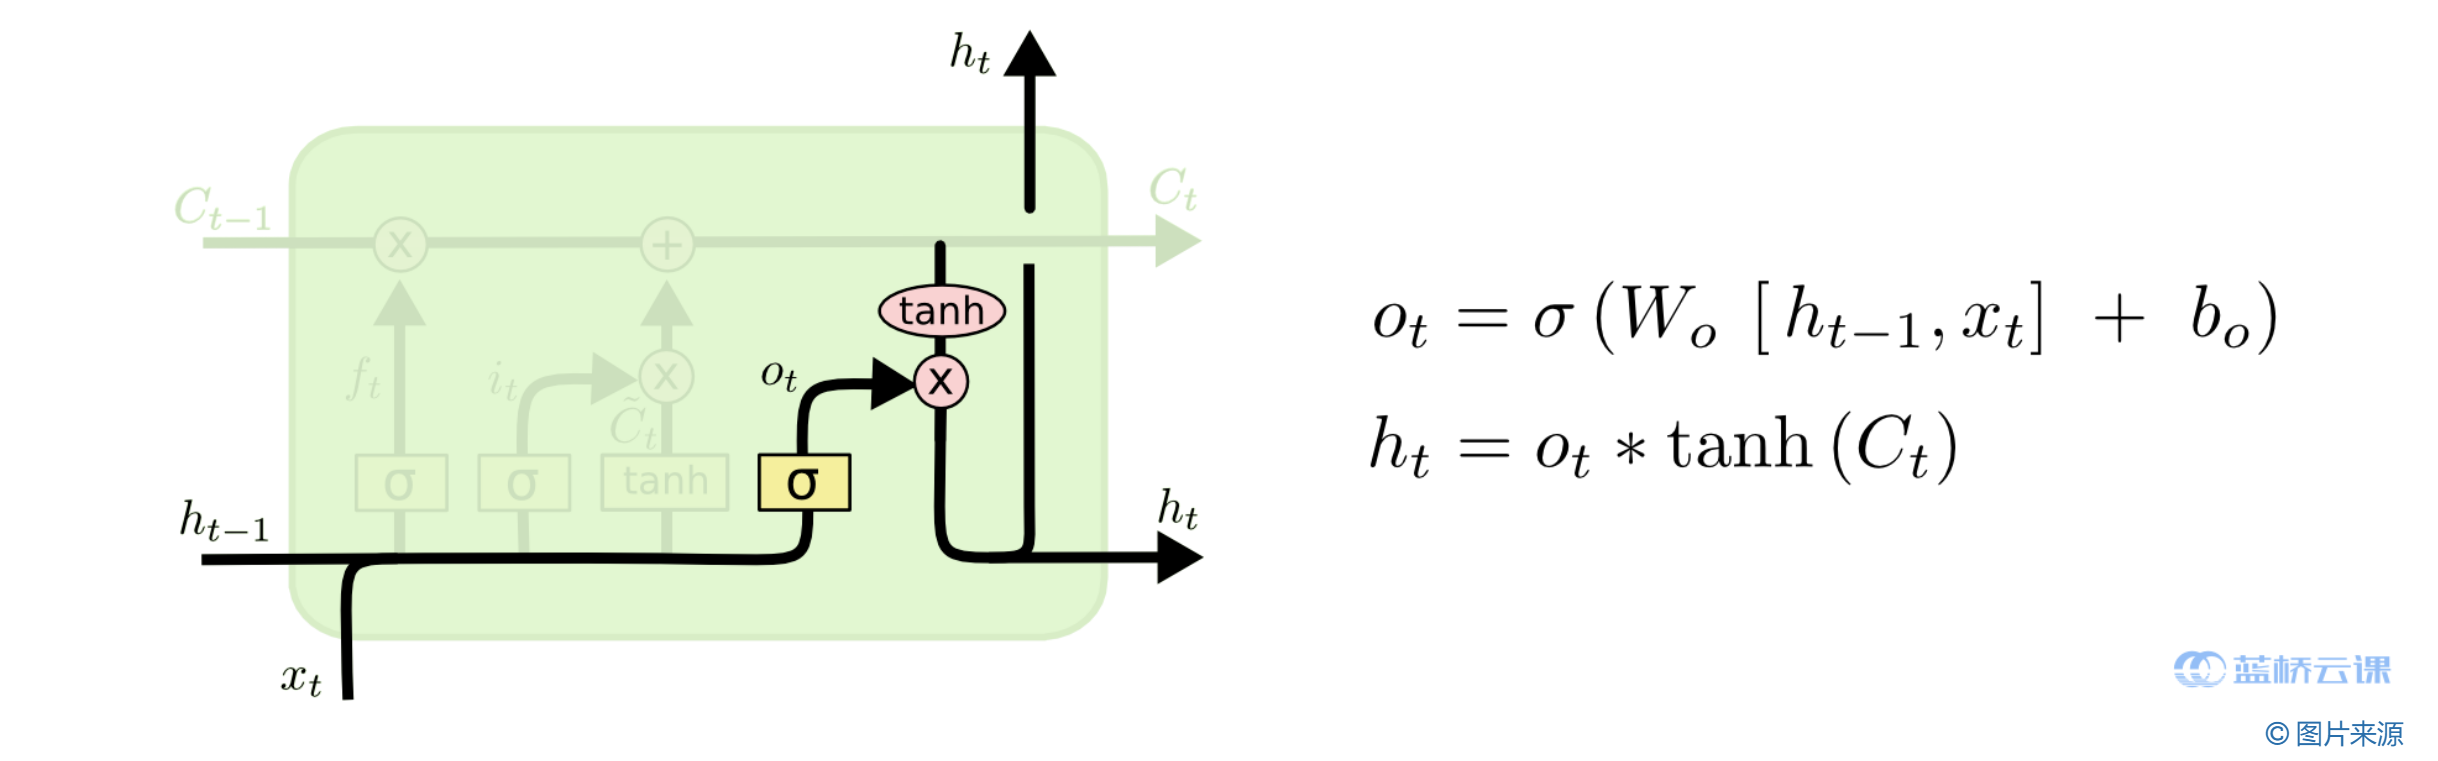

以上便是 LSTM 的内部结构，通过门控状态来控制传输状态，<font color=#0099ff>**记住对任务关键的信息，忘记不重要的信息**</font>；而不像普通的 RNN 那样只仅有一种记忆叠加的简单方式，可针对更长的文本。但同时也因为引入了很多内容，导致参数变多，也使得训练难度加大了很多。因此很多时候我们往往会使用效果和 LSTM 相当，但参数更少的 GRU 来构建大训练量的模型。

在 GRU 模型中只有两个门：

- 重置门（r）：控制前一状态有多少信息被写入到当前的候选状态 $\widetilde{h_t}$ 上的程度，重置门越小，前一状态的信息被写入的越少。
- 更新门（z）：控制前一时刻的状态信息与候选状态信息被带入到当前状态中的程度。

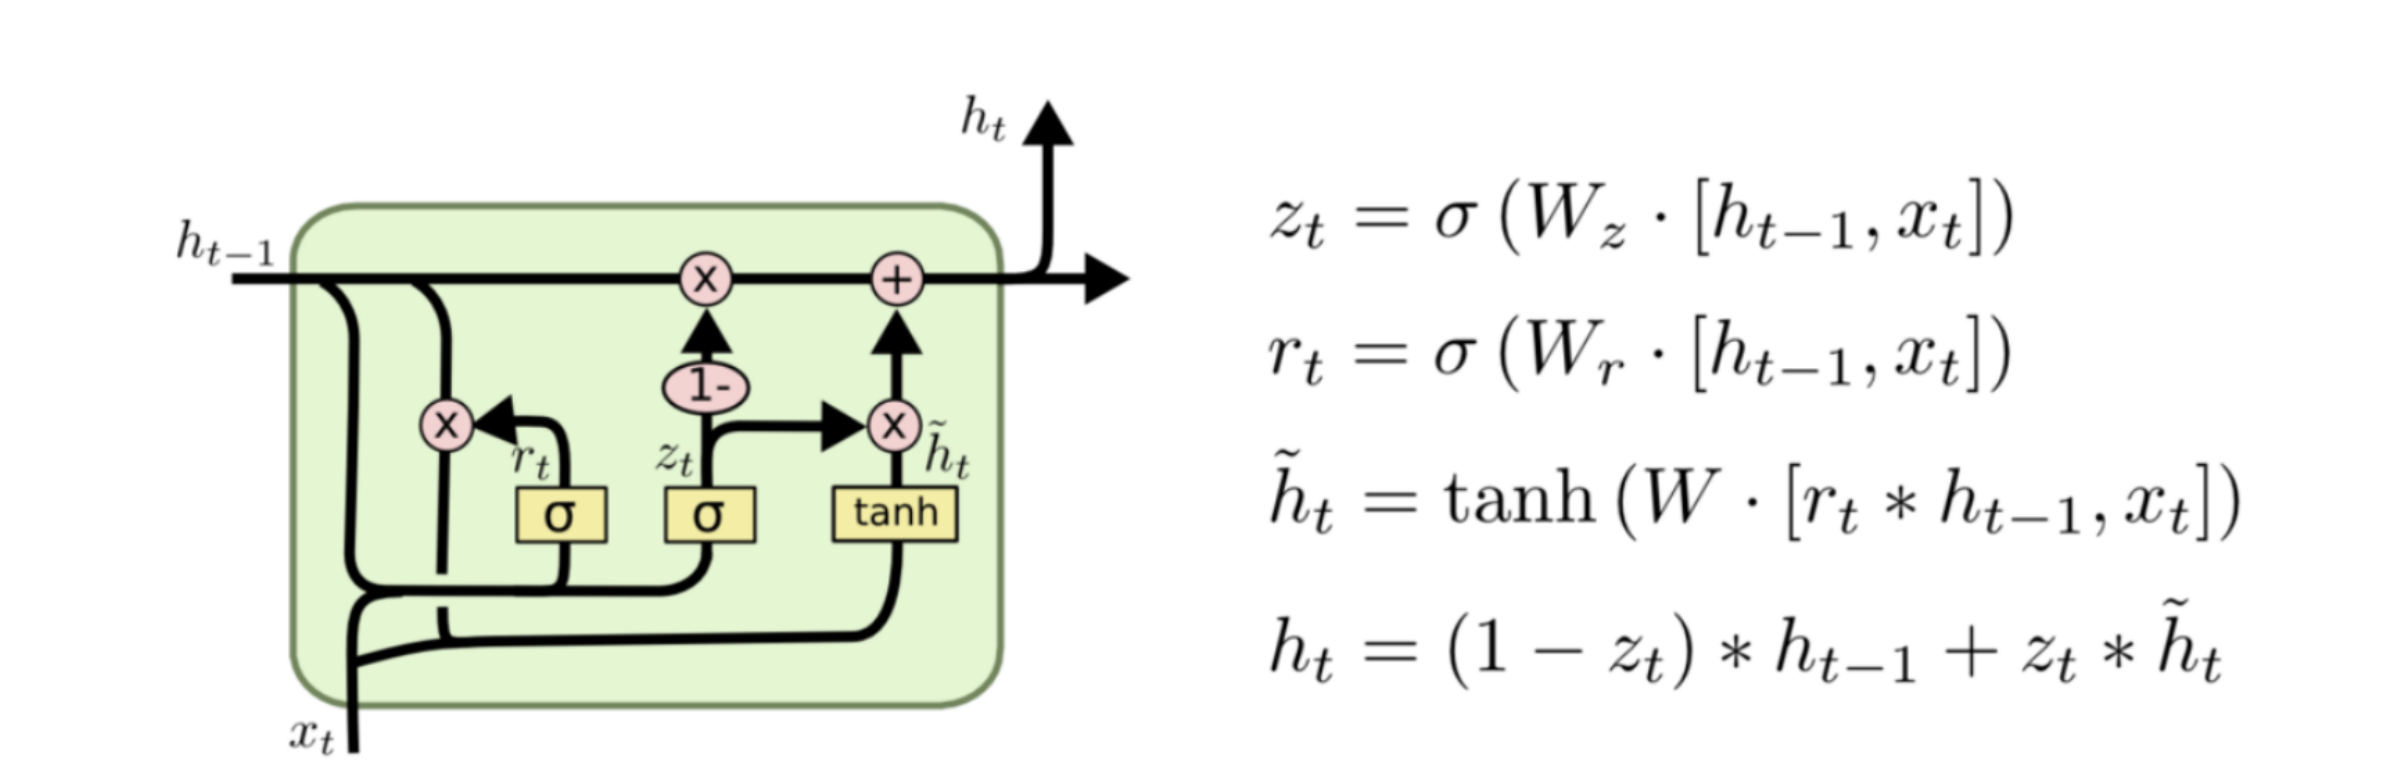

GRU 作为 LSTM 的一种变体，将忘记门和输入门合成了一个单一的更新门。同样还混合了细胞状态和隐藏状态，加诸其他一些改动。最终的模型比标准的 LSTM 模型要简单，也是非常流行的变体。

### 基于 PyTorch 搭建 LSTM

在 PyTorch 中直接调用 `nn.LSTM()` 便能获取已构建好的 LSTM 层结构，首先介绍其参数。

- `input_size`: 表示的是输入的数据维数。
- `hidden_size`: 表示的是输出维数。
- `num_layers`: 表示堆叠几层的 LSTM，默认是 1。
- `bias`: True 或者 False，决定是否使用 bias，默认为 True。
- `batch_first`: 如果为 True， 接受的数据输入是 (batch_size,seq_len,input_size)，如果为 False，则为 (seq_len,batch_size,input_size)，默认为 False。
- `dropout`: 表示除了最后一层之外都引入一个 dropout。
- `bidirectional`: 表示双向 LSTM，默认为 False。

接下来介绍 LSTM 的输入与输出。

输入包括：

- `input`: 表示输入数据，其维度为 (seq_len,batch_size,input_size)。
- `h_0`: 初始隐状态，维度为 (num_layers*num_directions,batch_size,hidden_size)，num_layers 表示 LSTM 的层数，num_directions 在 LSTM 为单向时为 1，双向时为 2，非必须输入，网络会提供默认初始状态。
- `c_0`: 初始的细胞状态，维度与 h_0 相同，非必须，网络会提供默认初始状态。

输出包括：

- `output`: 最后输出，维度为 (seq_len, batch_size, num_directions * hidden_size)。
- `h_n`: 最后时刻的输出隐藏状态，维度为 (num_layers * num_directions, batch_size, hidden_size)。
- `c_n`: 最后时刻的输出单元状态，维度与 h_n 相同。

定义 LSTM 层：

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [ ]:
import torch.nn as nn
lstm = nn.LSTM(input_size=10, hidden_size=30)
lstm

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 动手练习：</i>

接下来定义输入，输入数据大小应为 (seq_len,batch_size,input_size)：

In [ ]:
import torch
seq_len = 15
batch_size = 100
input_size = 10
# 模拟数据
x = torch.randn((seq_len, batch_size, input_size))

在 LSTM 层中输入 x，观察输出：

In [ ]:
y, (h, c) = lstm(x)
print(y.shape)
print(h.shape)
print(c.shape)

由于 num_layers 和 num_directions 均为 1，因此 h, c 的第一维度为 num_layers*num_directions = 1。

在处理文本数据进行诸如文本分类等任务时，一般在循环神经网络的基础上加<font color=#0099ff>**词向量层以及最后的输出层**</font>作为整体的神经网络模型，典型构架如下：

In [ ]:
class LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, output_size):
        super(LSTM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embedding_dim)  # 词向量层
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)  # LSTM 层
        # 输出分类层, output_size 为类别大小
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        # x: [seq_len, batch_size]
        embeds = self.embed(x)  # 经由词向量层
        # embeds: [seq_len, batch_size, embedding_dim]
        lstm_out, _ = self.lstm(embeds)  # 经同由 LSTM 层
        # lstm_out: [seq_len, batch_size, hidden_dim]
        y = self.fc(lstm_out[-1])  # 取最后一步的输出进入最后的分类层
        # y: [batch_size, output_size]
        return y

初始化 LSTM 模型：

In [ ]:
EMBEDDING_DIM = 128  # 词向量的大小为 128
HIDDEN_DIM = 216  # 隐层大小为 216
VOCAB_DIM = 1000  # 词典大小为 1000
OUTPUT_SIZE = 3  # 输出类别为 3 类
my_lstm = LSTM(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_DIM, OUTPUT_SIZE)
my_lstm

定义输入，查看输出：

In [ ]:
# seq_len 为 3，batch_size 为 2，各数字表示某单词的 id
x = torch.tensor([[1, 4, 5, 5], [3, 4, 9, 5]])
# x 大小为 [batch_size, seq_len],需要转置
y = my_lstm(x.permute(1, 0))
y.shape

输出大小为 2*3，即 batch_size * output_size。

### 实验总结

普通的神经网络对数据一并进行输入及处理，而循环神经网络能够从序列的维度出发，依次处理及输出信息，是对文本非常友好的一种神经网络。此外，为了解决 Vanilla RNN 不易训练的问题，前人们又提出了结构更复杂的 LSTM 以及 GRU 结构，在多种文本任务上有良好表现。本实验主要涉及以下知识点：

- Vanilla RNN
- LSTM 与 GRU
- 基于 PyTorch 搭建 LSTM

在下一个实验中，我们将基于循环神经网络，训练语言模型并搭建藏头诗生成器。